# About DataSet

Abstract Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. A second dataset with 106 features including 12 morphological, 4 shape and 90 color features obtained from these images was used.

Models were created by using Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms for the feature dataset and by using the Convolutional Neural Network (CNN) algorithm for the image dataset, and classification processes were performed. Statistical results of sensitivity, specificity, prediction, F1 score, accuracy, false positive rate and false negative rate were calculated using the confusion matrix values of the models and the results of each model were given in tables.

Classification successes from the models were achieved as 99.87% for ANN, 99.95% for DNN and 100% for CNN. With the results, it is seen that the models used in the study in the classification of rice varieties can be applied successfully in this field.

In [1]:
!pip install opencv-python

     -------------------------------------- 38.1/38.1 MB 715.7 kB/s eta 0:00:00


In [2]:
import tensorflow as tf 
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib
print(tf. __version__)

2.13.0


In [4]:
data_dir = "./Rice_Image_Dataset"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Rice_Image_Dataset')

In [5]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

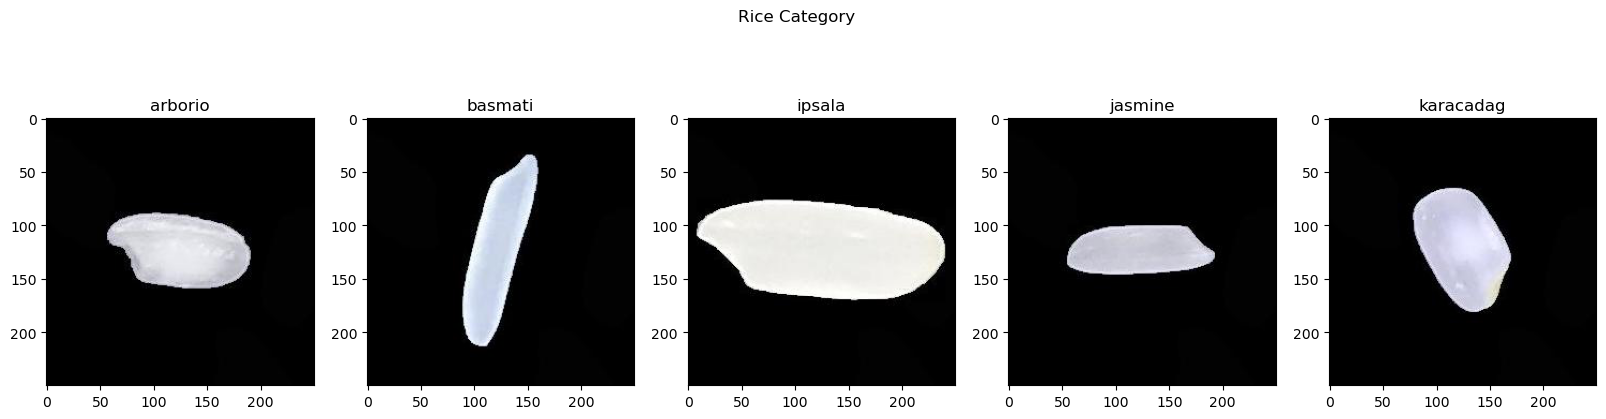

In [6]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

plt.show()

In [7]:
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}
img = cv2.imread(str(df_images['arborio'][0])) 
img.shape

(250, 250, 3)

In [8]:
X, y = [], [] 
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) 
        X.append(resized_img) 
        y.append(df_labels[label])
X = np.array(X)
X = X/255
y = np.array(y)

In [9]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

# Creating Model

In [10]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [11]:
base_model = MobileNet(weights="imagenet", 
                       include_top=False, 
                       input_shape=(224, 224, 3)) 
base_model.summary()

17225924/17225924 [==============================] - 31s 2us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                

 conv_pw_7_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_8 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8

In [12]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = './Rice_Image_Dataset'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

17225924/17225924 [==============================] - 23s 1us/step


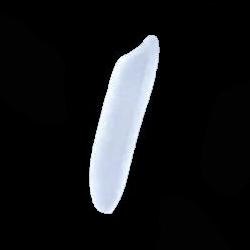

In [17]:
from IPython.display import Image
Image(filename='./Rice_Image_Dataset/Basmati/Basmati (1).jpg')

In [21]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image
preprocessed_image = prepare_image('./Basmati/Basmati (1).jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 2us/step


[[('n03658185', 'letter_opener', 0.28531173),
  ('n01924916', 'flatworm', 0.2406581),
  ('n01930112', 'nematode', 0.22599609),
  ('n03793489', 'mouse', 0.04218478),
  ('n02951585', 'can_opener', 0.024154667)]]

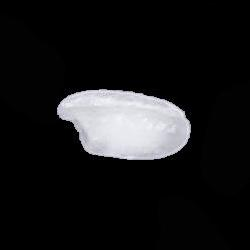

In [22]:
from IPython.display import Image
Image(filename='./Rice_Image_Dataset/Arborio/Arborio (1).jpg')

In [23]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
preprocessed_image = prepare_image('./Arborio/Arborio (1).jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 57ms/step


[[('n01910747', 'jellyfish', 0.26567578),
  ('n03929660', 'pick', 0.1467432),
  ('n01496331', 'electric_ray', 0.090365864),
  ('n03314780', 'face_powder', 0.036760043),
  ('n07684084', 'French_loaf', 0.033960544)]]

In [24]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(32, activation="relu"))
top_model.add(Dense(10, activation="softmax"))

top_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 32)                1605664   
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 1605994 (6.13 MB)
Trainable params: 1605994 (6.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False
transfer_model.summary()

transfer_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = transfer_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 sequential (Sequential)     (None, 10)                1605994   
                                                                 
Total params: 4834858 (18.44 MB)
Trainable params: 1605994 (6.13 MB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________
Epoch 1/10


C:\Users\Dell\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


71/71 [==============================] - 80s 1s/step - loss: 0.3894 - acc: 0.9169 - val_loss: 0.0407 - val_acc: 0.9894
Epoch 2/10
71/71 [==============================] - 74s 1s/step - loss: 0.0362 - acc: 0.9911 - val_loss: 0.2993 - val_acc: 0.9628
Epoch 3/10
71/71 [==============================] - 73s 1s/step - loss: 0.0477 - acc: 0.9889 - val_loss: 0.0245 - val_acc: 0.9947
Epoch 4/10
71/71 [==============================] - 81s 1s/step - loss: 0.0161 - acc: 0.9969 - val_loss: 0.0549 - val_acc: 0.9787
Epoch 5/10
71/71 [==============================] - 80s 1s/step - loss: 0.0022 - acc: 0.9987 - val_loss: 0.0325 - val_acc: 0.9947
Epoch 6/10
71/71 [==============================] - 80s 1s/step - loss: 0.0187 - acc: 0.9960 - val_loss: 0.0683 - val_acc: 0.9894
Epoch 7/10
71/71 [==============================] - 74s 1s/step - loss: 0.0216 - acc: 0.9938 - val_loss: 0.0329 - val_acc: 0.9947
Epoch 8/10
71/71 [==============================] - 85s 1s/step - loss: 0.0169 - acc: 0.9964 - val_lo

# Visulization

In [26]:
from sklearn.metrics import accuracy_score
y_pred = transfer_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy_score(y_test, y_pred_bool)

9/9 [==============================] - 15s 2s/step


0.9786476868327402

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96       117
           1       0.99      1.00      1.00       111
           2       1.00      0.99      1.00       113
           3       1.00      0.99      1.00       108
           4       0.91      1.00      0.95       113

    accuracy                           0.98       562
   macro avg       0.98      0.98      0.98       562
weighted avg       0.98      0.98      0.98       562



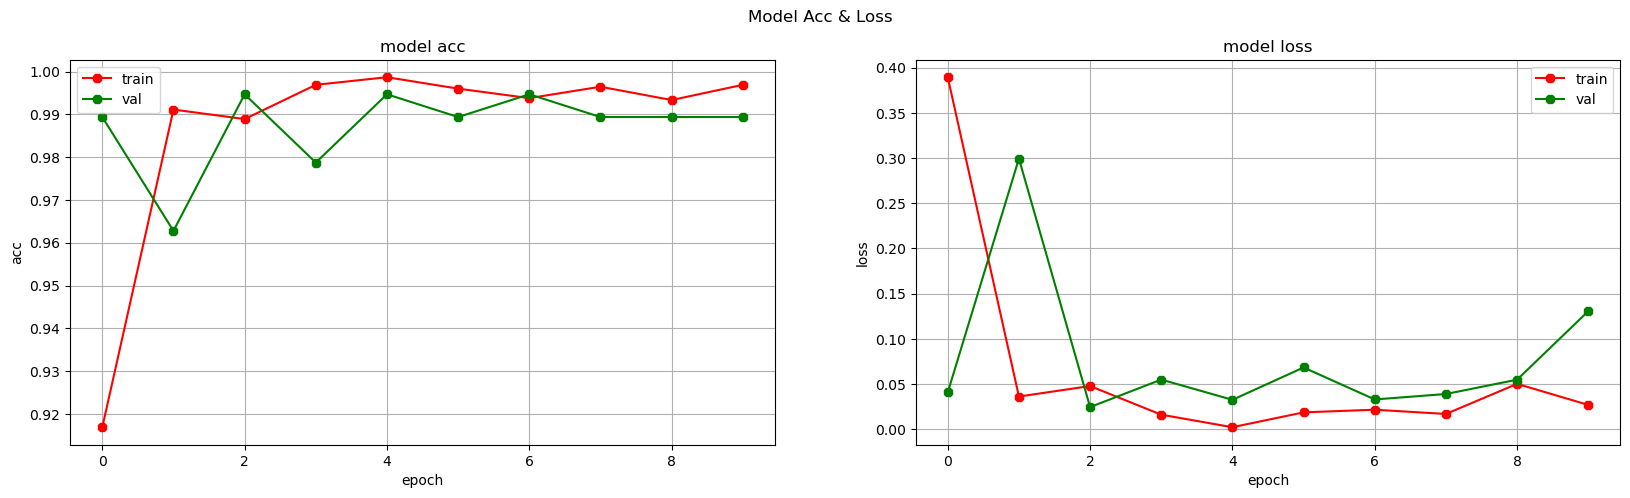

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('Model Acc & Loss')


ax[0].set_title('model acc')
ax[1].set_title('model loss')

ax[0].grid()
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('acc')
ax[0].plot(history.history['acc'], marker='8',color='red')
ax[0].plot(history.history['val_acc'], marker='8',color='green')
ax[0].legend(['train', 'val'])

ax[1].grid()
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].plot(history.history['loss'], marker='8',color='red')
ax[1].plot(history.history['val_loss'], marker='8',color='green')
ax[1].legend(['train', 'val'])

plt.show()

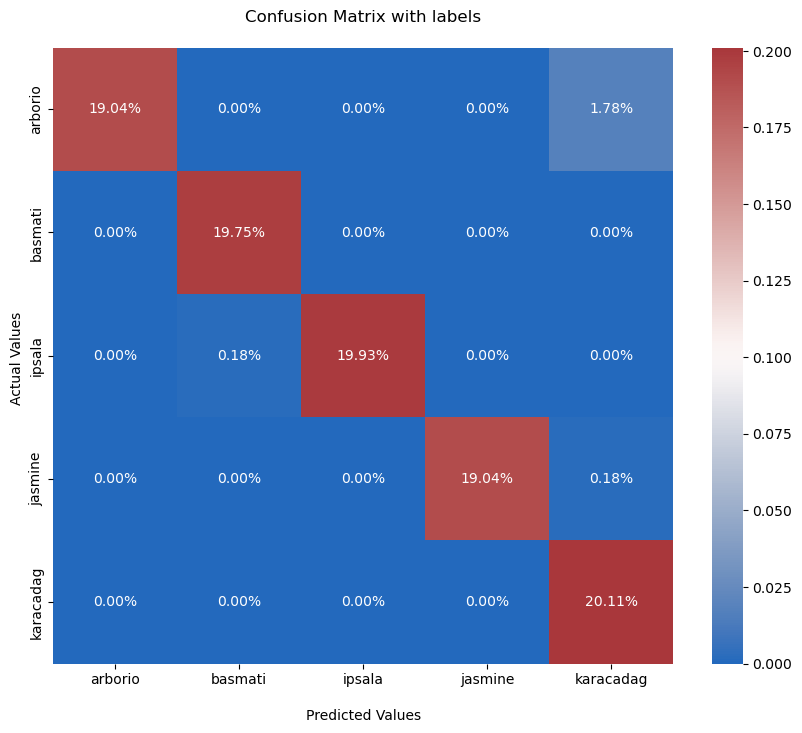

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bool)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(df_labels)
ax.yaxis.set_ticklabels(df_labels)

plt.show()

# Summery

1/1 [==============================] - 1s 616ms/step
(1, 10)
2


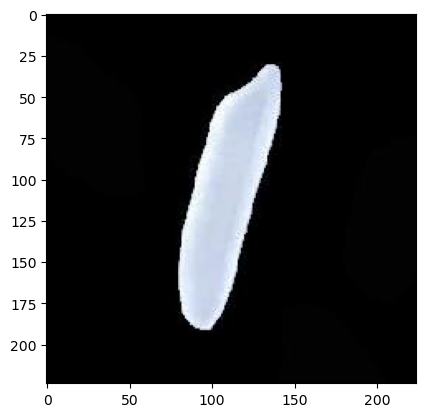

In [31]:
img_path = './Rice_Image_Dataset/Basmati/Basmati (1).jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=transfer_model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = np.argmax(p[0], axis=-1)
print(predicted_class)